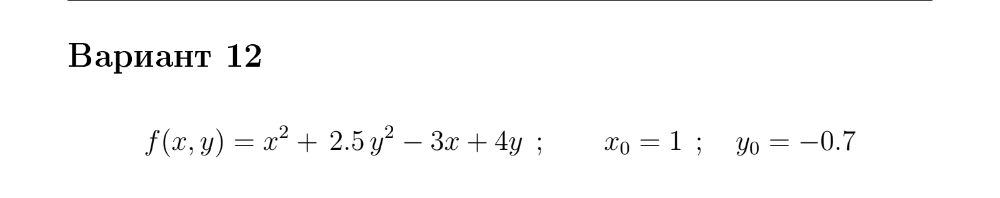

In [ ]:
from IPython.display import Image
display(Image('image.png'))

In [ ]:
import sympy # Библиотека для символьных вычислений
import numpy as np # работа с массивами

In [ ]:
x, y = sympy.symbols('x y')
f = x**2 + 2.5*(y**2) - 3*x + 4*y
x0, y0 = 1., -0.7
epsilon = 0.01

In [ ]:
def gradient(f, variables):
    """Вычисляет градиент функции f по переменным variables."""
    return [sympy.diff(f, var) for var in variables]

def gradient_descent(f, variables, initial_point, epsilon):
    """
    Метод наискорейшего спуска для поиска минимума функции.

    :param f: Функция, которую нужно минимизировать.
    :param variables: Список переменных (x, y).
    :param initial_point: Начальная точка (x0, y0).
    :param epsilon: Точность вычислений.
    :return: Точка численного глобального минимума, количество итераций,
    список точек на каждой итерации и список значений градиента на каждой итерации.
    """
    point = np.array(initial_point, dtype=float)
    iterations = 0
    grad_f = gradient(f, variables)

    gradient_values = [float(g.evalf(subs={x: point[0], y: point[1]})) for g in grad_f]

    points_list = [point.tolist()]
    gradient_list = [gradient_values]

    while True:
        gradient_values = [float(g.evalf(subs={x: point[0], y: point[1]})) for g in grad_f]
        if all(abs(gradient_values[i]) < epsilon for i in range(len(gradient_values))):
            break
        alpha = float(minimize_alpha(f, variables, point, gradient_values))
        point -= alpha * np.array(gradient_values)
        iterations += 1

        gradient_values = [float(g.evalf(subs={x: point[0], y: point[1]})) for g in grad_f]

        points_list.append(point.tolist())
        gradient_list.append(gradient_values)

    return point, iterations, points_list, gradient_list


def minimize_alpha(f, variables, point, gradient_values):
    """
    Метод одномерной оптимизации для поиска оптимального шага (alpha).

    :param f: Функция, которую нужно минимизировать.
    :param variables: Список переменных (x, y).
    :param point: Текущая точка (x, y).
    :param gradient_values: Значения градиента в текущей точке.
    :return: Оптимальное значение alpha.
    """
    alpha = sympy.symbols('alpha')
    phi = f.subs({variables[0]: point[0] - alpha * gradient_values[0],
                  variables[1]: point[1] - alpha * gradient_values[1]})
    alpha_opt = sympy.solve(sympy.diff(phi, alpha), alpha)

    return alpha_opt[0]

def conjugate_gradients(f, variables, initial_point, epsilon):
    """
    Метод сопряженных градиентов для поиска минимума функции.

    :param f: Функция, которую нужно минимизировать.
    :param variables: Список переменных (x, y).
    :param initial_point: Начальная точка (x0, y0).
    :param epsilon: Точность вычислений.
    :return: Точка численного глобального минимума, количество итераций,
    список точек на каждой итерации и список значений градиента на каждой итерации.
    """
    point = np.array(initial_point, dtype=float)
    iterations = 0
    grad_f = gradient(f, variables)
    gradient_values = [float(g.evalf(subs={x: point[0], y: point[1]})) for g in grad_f]
    p = -np.array(gradient_values, dtype=float)

    points_list = [point.tolist()]
    gradient_list = [gradient_values]

    while True:
        if all(abs(gradient_values[i]) < epsilon for i in range(len(gradient_values))):
            break
        alpha = float(minimize_alpha(f, variables, point, gradient_values))
        point += alpha * p
        new_gradient_values = [float(g.evalf(subs={x: point[0], y: point[1]})) for g in grad_f]
        beta = np.dot(new_gradient_values, new_gradient_values) / np.dot(gradient_values, gradient_values)
        p = -np.array(new_gradient_values, dtype=float) + beta * p
        gradient_values = new_gradient_values
        iterations += 1

        points_list.append(point.tolist())
        gradient_list.append(gradient_values)

    return point, iterations, points_list, gradient_list

In [ ]:
result, iterations, points_list, gradient_list = gradient_descent(f, [x, y], [x0, y0], epsilon)
print("Метод наискорейшего спуска:")
print("Начальная точка:", [x0, y0])
print("Количество итераций:", iterations)
print("Точка численного глобального минимума:", result)
print("Точки и значения градиента на каждой итерации:")
for i, point in enumerate(points_list):
    print(f"Iteration {i}: Point: {point}, Gradient: {gradient_list[i]}")

Метод наискорейшего спуска:
Начальная точка: [1.0, -0.7]
Количество итераций: 5
Точка численного глобального минимума: [ 1.49817181 -0.80146255]
Точки и значения градиента на каждой итерации:
Iteration 0: Point: [1.0, -0.7], Gradient: [-1.0, 0.5000000000000002]
Iteration 1: Point: [1.3846153846153846, -0.8923076923076924], Gradient: [-0.23076923076923084, -0.4615384615384618]
Iteration 2: Point: [1.4370629370629369, -0.7874125874125877], Gradient: [-0.12587412587412627, 0.06293706293706158]
Iteration 3: Point: [1.4854760623991397, -0.8116191500806885], Gradient: [-0.029047875201720696, -0.058095750403442614]
Iteration 4: Point: [1.4920778522177125, -0.7984155704435425], Gradient: [-0.015844295564575006, 0.007922147782287503]
Iteration 5: Point: [1.4981718120502412, -0.8014625503598068], Gradient: [-0.0036563758995176165, -0.007312751799034234]


In [ ]:
result, iterations, points_list, gradient_list = conjugate_gradients(f, [x, y], [x0, y0], epsilon)
print("Метод сопряженных градиентов:")
print("Начальная точка:", [x0, y0])
print("Количество итераций:", iterations)
print("Точка численного глобального минимума:", result)
print("Точки и значения градиента на каждой итерации:")
for i, point in enumerate(points_list):
    print(f"Iteration {i}: Point: {point}, Gradient: {gradient_list[i]}")

Метод сопряженных градиентов:
Начальная точка: [1.0, -0.7]
Количество итераций: 4
Точка численного глобального минимума: [ 1.4979554 -0.7995263]
Точки и значения градиента на каждой итерации:
Iteration 0: Point: [1.0, -0.7], Gradient: [-1.0, 0.5000000000000002]
Iteration 1: Point: [1.3846153846153846, -0.8923076923076924], Gradient: [-0.23076923076923084, -0.4615384615384618]
Iteration 2: Point: [1.4854760623991392, -0.8116191500806887], Gradient: [-0.029047875201721585, -0.058095750403443724]
Iteration 3: Point: [1.4936759186073616, -0.7971371173318231], Gradient: [-0.012648162785276806, 0.014314413340884347]
Iteration 4: Point: [1.4979553957899534, -0.7995262995837252], Gradient: [-0.004089208420093193, 0.0023685020813738467]
